<a href="https://colab.research.google.com/github/HongTorxh/Study_Paran/blob/main/tensorflow_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
image = train_x[0]

In [5]:
image.shape

(28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

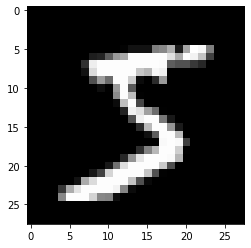

In [6]:
plt.imshow(image, 'gray')
plt.show

In [7]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [9]:
tf.keras.layers.Conv2D(filters = 3, kernel_size = (3,3) , strides = (1,1), padding = 'SAME', activation = 'relu')

In [10]:
tf.keras.layers.Conv2D(3,3,1,'SAME')

In [11]:
image.dtype

dtype('uint8')

In [12]:
image = tf.cast(image, dtype = tf.float32)
image.dtype

tf.float32

In [13]:
layer = tf.keras.layers.Conv2D(5,3,1, padding = "SAME")
layer

In [14]:
output = layer(image)
output.shape

TensorShape([1, 28, 28, 5])

In [15]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [16]:
np.min(output), np.max(output)

(-235.24318, 277.3102)

<function matplotlib.pyplot.show(*args, **kw)>

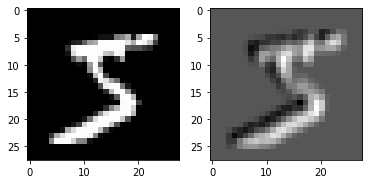

In [17]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0], 'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0], 'gray')
plt.show

In [18]:
weight = layer.get_weights()
weight

[array([[[[ 0.28987113, -0.2908563 , -0.24585748,  0.09085688,
            0.0977509 ]],
 
         [[ 0.23226658,  0.3311015 ,  0.02656469, -0.11952505,
           -0.09888785]],
 
         [[-0.1383481 , -0.19594455,  0.3198345 ,  0.07071504,
            0.23432341]]],
 
 
        [[[ 0.29596654, -0.11911671,  0.32605067, -0.32478833,
           -0.11526895]],
 
         [[ 0.24109271, -0.07789627, -0.2590526 ,  0.14057255,
           -0.12898755]],
 
         [[-0.27273235, -0.28135237, -0.24029152, -0.21532893,
            0.08552361]]],
 
 
        [[[ 0.2464157 , -0.07864952, -0.21599182, -0.1662786 ,
            0.15517274]],
 
         [[-0.16951346, -0.2874114 ,  0.30499795, -0.20943515,
           -0.23297843]],
 
         [[-0.26070747,  0.12220564,  0.06363329, -0.14061873,
            0.02943158]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [19]:
len(weight)

2

In [20]:
print("weight : ", weight[0].shape, "bias :",weight[1].shape)

weight :  (3, 3, 1, 5) bias : (5,)


<function matplotlib.pyplot.show(*args, **kw)>

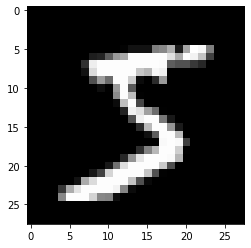

In [21]:
plt.imshow(image[0, : ,:, 0], 'gray')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

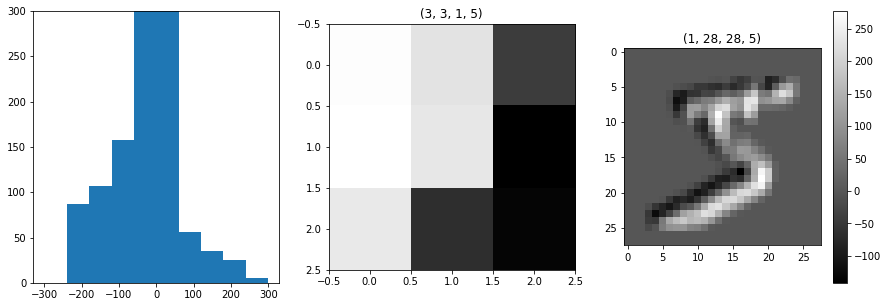

In [47]:
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range = [-300, 300])
plt.ylim(0,300)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show

In [48]:
tf.keras.layers.ReLU()

In [49]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)
act_output.shape

TensorShape([1, 28, 28, 5])

In [50]:
np.min(output), np.max(output)

(-235.24318, 277.3102)

In [51]:
np.min(act_output), np.max(act_output)

(0.0, 277.3102)

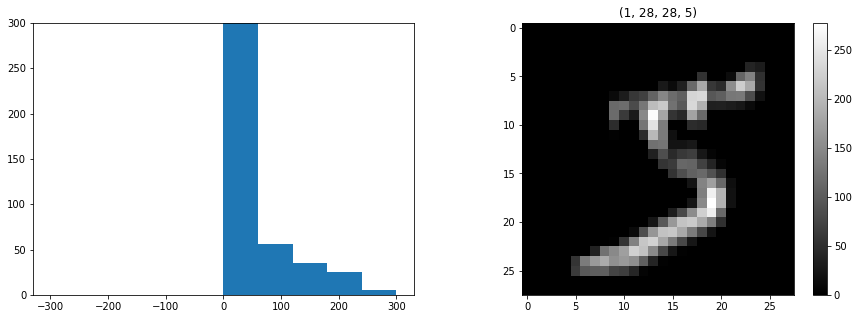

In [52]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range = [-300, 300])
plt.ylim(0,300)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

In [53]:
tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'SAME')

In [54]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'SAME')
pool_output = pool_layer(act_output)

In [55]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [56]:
pool_output.shape

TensorShape([1, 14, 14, 5])

<function matplotlib.pyplot.show(*args, **kw)>

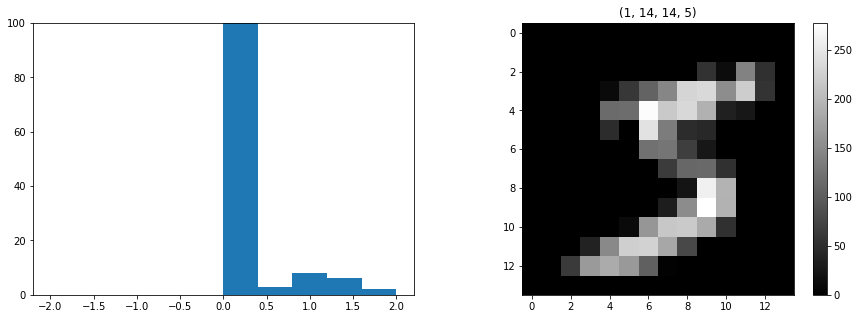

In [57]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range = [-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show


In [58]:
import tensorflow as tf

In [59]:
tf.keras.layers.Flatten()

In [60]:
layer = tf.keras.layers.Flatten()
flatten = layer(output)

In [61]:
output.shape

TensorShape([1, 28, 28, 5])

In [62]:
flatten.shape

TensorShape([1, 3920])

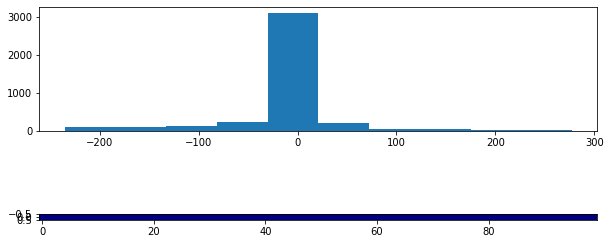

In [63]:
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
plt.hist(flatten.numpy().ravel())
plt.subplot(2,1,2)
plt.imshow(flatten[:,:100], 'jet')
plt.show()

In [64]:
tf.keras.layers.Dense(32, activation = 'relu')

In [66]:
layer = tf.keras.layers.Dense(32, activation = 'relu')

In [67]:
output = layer(flatten)

In [68]:
output.shape

TensorShape([1, 32])

In [69]:
layer_2 = tf.keras.layers.Dense(10, activation = 'relu')
output_example = layer_2(output)

In [70]:
output_example.shape

TensorShape([1, 10])

In [71]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [72]:
output.shape

TensorShape([1, 32])

In [73]:
from tensorflow.keras import layers

In [75]:
input_shape = (28,28,1)
num_classes = 10

In [87]:
inputs = layers.Input(shape = input_shape)

net = layers.Conv2D(32, 3, padding = "SAME")(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding = "SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 3, padding = "SAME")(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding = "SAME")(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs = net, name = 'Basic_CNN')

In [88]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 activation_28 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_29 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                         